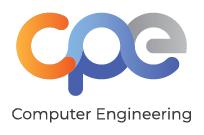

## Artificial Neural Network Implementation with Matrix Data structure  
(using numpy module)  

Reference:  
https://www.analyticsvidhya.com/blog/2020/07/neural-networks-from-scratch-in-python-and-r/

### ขั้นตอนที่ 1: รู้จักข้อมูล Data set  
ในขั้นตอนนี้คือ กระบวนการโหลด data set เข้าสู่โปรแกรมของเรา โดยมาก data set จะอยู่ในไฟล์ .csv ดังนั้นเราต้องเปิดไฟล์ .csv แล้วทำการ โหลดข้อมูลมาเก็บไว้ก่อน
เราสามารถเรียกใช้ moduleอื่นๆ  เข้ามาช่วยจัดการได้เช่น csv  หรือ pandas  
**import csv** หรือ **import pandas as pd**  
ในที่นี่จะใช้ csv module เพื่อดึงข้อมูลเข้ามาใส่ใน array ของ numpy module

In [1]:
import csv
import numpy as np

with open('sonar.all-data.csv') as Data_file:
    Data_list = csv.reader(Data_file)
    Data = [Data for Data in Data_list]
Rawdata_array = np.asarray(Data)

#ลองพิมพ์ตัวอย่างของข้อมูลที่โหลดเข้ามาเพื่อการตรวจสอบ
print("Example of rawdata[{0:3d}]: {1}".format(0,Rawdata_array[0]))
print("Example of rawdata[{0:3d}]: {1}".format(1,Rawdata_array[1]))
print("         :           :                    :  ")
print("Example of rawdata[{0:3d}]: {1}".format(len(Rawdata_array)-2,Rawdata_array[-2]))
print("Example of rawdata[{0:3d}]: {1}".format(len(Rawdata_array)-1,Rawdata_array[-1]))
print("Number of rawdata:", len(Rawdata_array))

Example of rawdata[  0]: ['0.0200' '0.0371' '0.0428' '0.0207' '0.0954' '0.0986' '0.1539' '0.1601'
 '0.3109' '0.2111' '0.1609' '0.1582' '0.2238' '0.0645' '0.0660' '0.2273'
 '0.3100' '0.2999' '0.5078' '0.4797' '0.5783' '0.5071' '0.4328' '0.5550'
 '0.6711' '0.6415' '0.7104' '0.8080' '0.6791' '0.3857' '0.1307' '0.2604'
 '0.5121' '0.7547' '0.8537' '0.8507' '0.6692' '0.6097' '0.4943' '0.2744'
 '0.0510' '0.2834' '0.2825' '0.4256' '0.2641' '0.1386' '0.1051' '0.1343'
 '0.0383' '0.0324' '0.0232' '0.0027' '0.0065' '0.0159' '0.0072' '0.0167'
 '0.0180' '0.0084' '0.0090' '0.0032' 'R']
Example of rawdata[  1]: ['0.0453' '0.0523' '0.0843' '0.0689' '0.1183' '0.2583' '0.2156' '0.3481'
 '0.3337' '0.2872' '0.4918' '0.6552' '0.6919' '0.7797' '0.7464' '0.9444'
 '1.0000' '0.8874' '0.8024' '0.7818' '0.5212' '0.4052' '0.3957' '0.3914'
 '0.3250' '0.3200' '0.3271' '0.2767' '0.4423' '0.2028' '0.3788' '0.2947'
 '0.1984' '0.2341' '0.1306' '0.4182' '0.3835' '0.1057' '0.1840' '0.1970'
 '0.1674' '0.0583' '0.1401' '0.1

In [2]:
# เช็คขนาดของ raw data
Rawdata_array.shape

(208, 61)

### Dataset Explanation 
ข้อมูลชุดนี้เป็นการสำรวจวัตถุที่อยู่ใต้ทะเล ประกอบด้วย 208 records 61 features   
โดย 60 features เเรก เเสดงถึงคลื่นความถี่ที่ได้รับจากการใช้ sonar
ส่วน feature ที่ 61 เป็นการ label ว่าวัตถุชิ้นดังกล่าว เป็นวัสดุชนิดใด ดังนี้ 

* R : ก้อนหิน
* M : เเร่โลหะ



ในตอนแรกข้อมูลที่เป็น feature และ target จะถูกโหลดมารวมกันอยู่ใน array เดียวกัน จึงต้องแยกข้อมูลออกเป็นส่วนที่เป็น input's feature และ เป็น output's target

In [3]:
Input_array = np.zeros((len(Rawdata_array),len(Rawdata_array[0])-1),dtype = 'f')
Target_list = list()
for i in range(len(Rawdata_array)):
        Input_array[i] = np.array(Rawdata_array[i][0:len(Rawdata_array[i])-1],dtype = 'f')
        Target_list.append(Rawdata_array[i][-1])
        
#ลองพิมพ์ทั้งส่วนที่เป็น feature และ target เพื่อการตรวจสอบ
print("Example of Input[{0:3d}]: {1}".format(0,Input_array[0]))
print("Example of Input[{0:3d}]: {1}".format(1,Input_array[1]))
print("         :         :              :  ")
print("Example of Input[{0:3d}]: {1}".format(len(Input_array)-2,Input_array[-2]))
print("Example of Input[{0:3d}]: {1}".format(len(Input_array)-1,Input_array[-1]))
print("Shape of Input: ",Input_array.shape)

print("\nExample of Target[{0:3d}]: {1}".format(0,Target_list[0]))
print("Example of Target[{0:3d}]: {1}".format(1,Target_list[1]))
print("         :      :           :  ")
print("Example of Target[{0:3d}]: {1}".format(len(Target_list)-2,Target_list[-2]))
print("Example of Target[{0:3d}]: {1}".format(len(Target_list)-1,Target_list[-1]))
print("Number of Target:", len(Target_list))

Example of Input[  0]: [0.02   0.0371 0.0428 0.0207 0.0954 0.0986 0.1539 0.1601 0.3109 0.2111
 0.1609 0.1582 0.2238 0.0645 0.066  0.2273 0.31   0.2999 0.5078 0.4797
 0.5783 0.5071 0.4328 0.555  0.6711 0.6415 0.7104 0.808  0.6791 0.3857
 0.1307 0.2604 0.5121 0.7547 0.8537 0.8507 0.6692 0.6097 0.4943 0.2744
 0.051  0.2834 0.2825 0.4256 0.2641 0.1386 0.1051 0.1343 0.0383 0.0324
 0.0232 0.0027 0.0065 0.0159 0.0072 0.0167 0.018  0.0084 0.009  0.0032]
Example of Input[  1]: [0.0453 0.0523 0.0843 0.0689 0.1183 0.2583 0.2156 0.3481 0.3337 0.2872
 0.4918 0.6552 0.6919 0.7797 0.7464 0.9444 1.     0.8874 0.8024 0.7818
 0.5212 0.4052 0.3957 0.3914 0.325  0.32   0.3271 0.2767 0.4423 0.2028
 0.3788 0.2947 0.1984 0.2341 0.1306 0.4182 0.3835 0.1057 0.184  0.197
 0.1674 0.0583 0.1401 0.1628 0.0621 0.0203 0.053  0.0742 0.0409 0.0061
 0.0125 0.0084 0.0089 0.0048 0.0094 0.0191 0.014  0.0049 0.0052 0.0044]
         :         :              :  
Example of Input[206]: [0.0303 0.0353 0.049  0.0608 0.0167 0.13

___
### ขั้นตอนที่2: clean Data  
ในขั้นตอนนี้ เมื่อเราไม่แน่ใจว่าข้อมูลที่โหลดเข้ามา มีข้อมูลที่ผิดพลาดหรือไม่ ให้ ทำการ clean data ก่อน โดยในบางครั้ง ข้อมูลอาจจะมีค่าที่ผิดพลาดได้เช่น ค่าเกินกว่าช่วงที่กำหนด หรือ ค่าขาดหายไป (อาจจะถูกบันทึกเป็น 0 หรือ N/A หรือ None) เราสามารถแก้ไขได้โดยวิธีต่าง ๆ เช่น ปรับช่วงให้ใหม่ หรือ เติมข้อมูลที่ขาดหายไป ถ้าหากข้อมูลมีจำนวน observation มาเพียงพอ เราอาจจะตัดข้อมูลใน observation หรือ record นั้นทิ้งไปเลยก็ได้  
* สำหรับข้อมูลในส่วนที่เป็น input นอกจากทำการ clean data แล้วยังต้องปรับ data type ให้ถูกต้องก่อน เนื่องจากในการ load มาอาจจะเป็นอยู่ในรูปของ text อยู่
* ลองเข็คค่าทางสถิติสำหรับแต่ละ feature ดูว่ามีความเหมาะสมหรือไม่ เช่น ไม่มี feature ใด feature หนึ่งที่มีค่าสูงมากเกินไป และ อาจจะทำการ normalize หรือ standardize แต่ละ feature ให้มีช่วงของค่าและการกระจายตัวที่สมดุลกัน เราเรียกกระบวนการเหล่านี้ว่า Pre-Processing
* สำหรับข้อมูลในส่วนที่เป็น output ถ้าหากได้รับข้อมูลที่ label มาเป็น character เช่น Y/N หรือ True/False ให้เปลี่ยนเป็น integer เช่น 0/1   

* ถ้าข้อมูลเป็นแบบ multiclass (มีการแบ่งคราสมากกว่า 2 class ขึ้นไป) อาจจะเปลี่ยนจำนวน output ให้เท่ากับจำนวนclass เช่น ปรับให้อยู่ในรูปนี้ class1 = 0 0 1, class2 = 0 1 0, class3 = 1 0 0

In [4]:
# หากพบว่ามีข้อมูลที่ว่างเปล่าอยู่จึงทำการลบทิ้ง เช่น
# Input_array = np.delete(Input_array,150,0)
print("Shape of Cleaned Input:", Input_array.shape)
NumData, NumInput = Input_array.shape

Shape of Cleaned Input: (208, 60)


In [5]:
#targetอาจจะมาในรูปของ text เลยต้องแปลงให้กลายเป็นตัวเลข หรือ เข็คจำนวนของ class
Class = list(set(Target_list)) # set ไม่นับตัวซำ้
NumOutput = len(Class)

In [6]:
#ปรับให้อยู่ในรูปนี้ class R = 0, class M = 1
Target_array = np.zeros((NumData,1), dtype='i')
for i in range(NumData):
    if Target_list[i] == "R":  
        Target_array[i] = 0
    else:
        Target_array[i] = 1
        

In [7]:
Target_array 

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [8]:
Input_array

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]],
      dtype=float32)

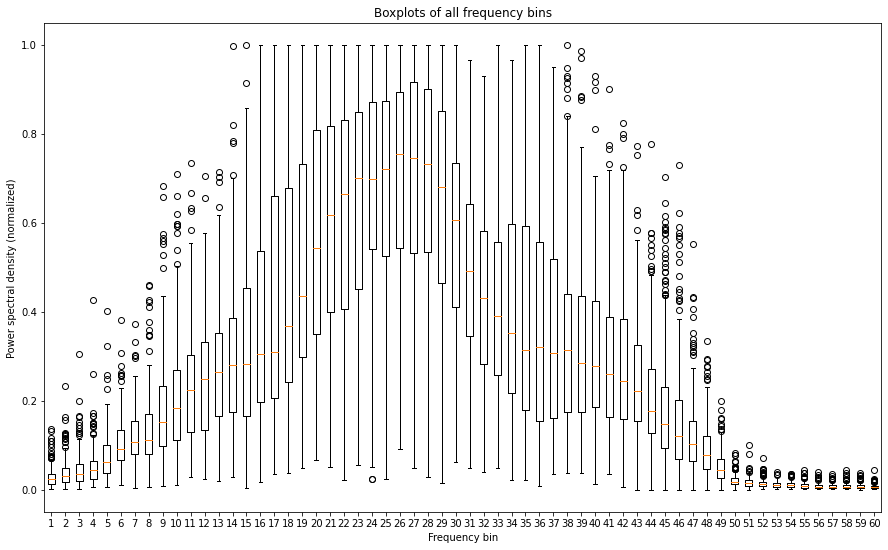

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(15, 9))
plt.boxplot(Input_array)
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.show()

**ลักษณะ box plot เปรียบเทียบกับรูปเเบบการกระจายตัวของข้อมูล**

![image](bloxplots_skewed.jpg)

##  Standardize Data
**เหตุผลที่เลือกการ Standardize** <br>
* ข้อมูลทั้งหมดอยู่ในช่วง 0.0-1.0 อยู่เเล้วจึงไม่จำเป็นต้อง Normalize
* จากการดูภาพรวมข้อมูล boxplot จะเห็นว่าข้อมูลเเต่ละ feature ส่วนใหญ่จะเป็นการกระจายตัวเเบบ Normal distribution ซึ่งตรงกับความเข้าใจจากการหาข้อมูลที่ว่า                                  "ข้อมูล Normal distribution เหมาะกับการ Standardize "



**resource:** 
* https://medium.com/data-espresso/scale-or-standardize-or-normalize-ef905613f275
* https://benalexkeen.com/feature-scaling-with-scikit-learn/
* https://www.statology.org/standardization-vs-normalization/#:~:text=A%20normalized%20dataset%20will%20always,the%20maximum%20and%20minimum%20values.
* https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=Standardization%20is%20useful%20when%20your,regression%2C%20and%20linear%20discriminant%20analysis.


![image](standardScaler.png)

In [10]:
# mean and std BEFORE Standardize
old_mean = Input_array.mean()
old_std = Input_array.std()

# Standard Scaler
for i in range(NumData):
    for j in range(NumInput):
        Input_array[i][j] = (Input_array[i][j] - Input_array.mean())/ Input_array.std()
    


In [11]:
# Standardized Input Data 
Input_array

array([[-0.924096  , -0.86276037, -0.84183705, ..., -0.9402258 ,
        -0.93725187, -0.956394  ],
       [-0.81013644, -0.7853111 , -0.6743275 , ..., -0.9251078 ,
        -0.9232634 , -0.92513406],
       [-0.8508234 , -0.7423153 , -0.5676746 , ..., -0.86539155,
        -0.88746303, -0.8923357 ],
       ...,
       [-0.17159615, -0.18592198, -0.22929992, ..., -0.23556402,
        -0.24582   , -0.2535438 ],
       [-0.20760879, -0.19913726, -0.17598683, ..., -0.24452709,
        -0.25173816, -0.24967666],
       [-0.21390034, -0.19650204, -0.23473376, ..., -0.25083455,
        -0.24658594, -0.2374539 ]], dtype=float32)

In [12]:
# จากความเข้าใจว่าหลังจากที่ทำการ standardize จะเป็นการพยายามทำให้ค่า mean = 0 เเละ std = 1
print(" OLD Mean : ", old_mean)
print(" OLD STD : ", old_std)
print("-------------------------------")
print(" NEW Mean : ", Input_array.mean())
print(" NEW STD : ", Input_array.std())

 OLD Mean :  0.2813213
 OLD STD :  0.28278586
-------------------------------
 NEW Mean :  0.15247831
 NEW STD :  0.5938011


---
### ขั้นตอนที่3: แบ่งข้อมูลออกเป็น trian set และ test set   
เรามีความจำเป็นต้องแบ่งข้อมูลออกเป็น2 ส่วนคือ train set คือ ข้อมูลที่เอาไว้สำหรับ train model ANN และ test set สำหรับทดสอบหาความแม่นยำของ model   
ในขั้นนี้ สามารถใช้ เทคนิค k-fold cross validation ได้ โดยแบ่งข้อมูลออกเป็น k ชุด ให้ k-1 ชุดแรก เป็น train set และทีเหลืออีกหนึ่งเป็น test set   
และสลับการทดลอง train และ test ทดสอบความแม่นยำ กันทั้งหมด k รอบ โดยให้ข้อมูลทุกชุดได้เป็น train set และ ได้เป็น test set อย่างน้อย 1 ครั้ง   

ในทางโปรแกรม เราสามารถใช้ slicing เพื่อช่วยให้ง่ายขึ้นได้

โดยพยายามแบ่งจำนวน class ใน train set ให้เท่า ๆ กันทุก class เพื่อไม่ให้ model ของเราเกิดการ bias ไปยัง class ใด class หนึ่งขึ้น  

In [13]:
# แบ่งข้อมูลเป็น 10 fold-crossvalidation
# เพราะฉะนั้น train set = 187 ตัว  และ test set = 21 ตัว
# เราจะทำการ train และ test ทั้งหมด 10 รอบ แล้วหาค่าเฉลี่ยความแม่นยำ
# รอบแรก (round 1) จะใช้ข้อมูล fold 1-9 เป็น train set และ ใช้ fold 10 เป็น test set


Input_Train = np.zeros((187,60),dtype='f')
Input_Test = np.zeros((21,60),dtype='f')
Target_Train = np.zeros((187,1),dtype='i')
Target_Test = np.zeros((21,1),dtype='i')

NumTest = 0
NumTrain = 0

# ไล่ไปทีละเซต 
# class ต้องเท่าๆกันให้ทุกตัวมีโอกาสเป็นทั้ง train test
for i in range(NumData):
     # การกำหนด test set โดยใช้ค่า index
     # ในการทดสอบรอบต่อไปให้มาเปลี่ยนเลขเศษที่เหลือจากการหาร
     # เพื่อให้ทุกตัวมีโอกาสเป็นทั้ง train เเละ test เท่าๆกัน

    if (i%10) == 0:
        
        Input_Test[NumTest] = Input_array[i]
        Target_Test[NumTest] = Target_array[i]
        NumTest += 1
        
    else:
        
        Input_Train[NumTrain] = Input_array[i]
        Target_Train[NumTrain] = Target_array[i]
        NumTrain += 1
print('Number of Train data: ',NumTrain)
print('Number of Test data: ',NumTest)

Number of Train data:  187
Number of Test data:  21


In [14]:
print("Input train size : ", Input_Train.shape)
print("Input test size : ",Input_Test.shape)

Input train size :  (187, 60)
Input test size :  (21, 60)


In [15]:
print("Output train size : ", Target_Train.shape)
print("Output test size : ", Target_Test.shape)

Output train size :  (187, 1)
Output test size :  (21, 1)


In [16]:
np.random.seed(14)

In [17]:
Target_Test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [18]:
Target_Train.shape

(187, 1)

In [19]:
# converting the input in matrix form
Input = Input_Train.T
print("Input in matrix form:\n", Input)

# shape of input matrix
print("\nShape of Input Matrix:", Input.shape)

Input in matrix form:
 [[-0.81013644 -0.8508234  -0.8843408  ... -0.17159615 -0.20760879
  -0.21390034]
 [-0.7853111  -0.7423153  -0.86021876 ... -0.18592198 -0.19913726
  -0.19650204]
 [-0.6743275  -0.5676746  -0.710679   ... -0.22929992 -0.17598683
  -0.23473376]
 ...
 [-0.9251078  -0.86539155 -0.8838596  ... -0.23556402 -0.24452709
  -0.25083455]
 [-0.9232634  -0.88746303 -0.8844515  ... -0.24582    -0.25173816
  -0.24658594]
 [-0.92513406 -0.8923357  -0.85880876 ... -0.2535438  -0.24967666
  -0.2374539 ]]

Shape of Input Matrix: (60, 187)


In [20]:
# output in matrix form
Target = Target_Train.T

print("\nTarget in matrix form:\n", Target)

# shape of input array
print("\nShape of Target:", Target.shape)


Target in matrix form:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1]]

Shape of Target: (1, 187)


----
### ขั้นตอนที่ 4 กำหนด Hyperparameter ต่าง ๆ ของ Model  
กำหนดขนาดของ ANN, Learning rate, Activate function เช่น
* จำนวน Input Unit = จำนวน feature 
* จำนวน Hidden Layer = 1 ขึ้นไป (เริ่มต้นด้วย 1 หรือ 2) 
* จำนวน Hidden Unit = ประมาณครึ่งหนี่ง หรือ 2/3 ของจำนวน Input Unit  + จำนวน Output Unit
* จำนวน Output Unit = จำนวน class (ในกรณีที่เป็น 2 class สามารถลดลงเหลือ 1 unit ได้)  
* Learning Rate = ค่าน้อย ๆ เช่น 0.01 หรือ 0.005 
* Activate Function เช่น Sigmoid หรือ ReLu  

จากขนาดของ ANN และ Input data จะทำให้เกิด
1. Input Matrix เป็น Matrix ที่เกิดจากเอา Input Unit vector มาประกอบกัน ทำให้มีขนาดเป็น จำนวนแถวเป็น จำนวน feature และจำนวนคอลัมภ์เป็น จำนวน observation = No.Input unit x No.Observation  
2. Hidden Unit vector = No.Hidden unit x 1  ขึ้นกับว่า มี Hidden Layer กี่ layer ถ้ามีมากกว่า 1 ก็จะมี Hidden vector มากกว่า 1 ตัว
3. Output Unit vector = No.Output unit x 1
4. Weight Matirx เช่น No.Input Unit x  No.Output Unit หรือใน layer ถัด ๆไป

In [21]:
NumHidden = 3
print("No.Input Unit: ",NumInput)
print("No.Hidden Layer: ", 1)
print("No.Hidden Unit: ",NumHidden)
print("No.Output Unit: ",NumOutput)

No.Input Unit:  60
No.Hidden Layer:  1
No.Hidden Unit:  3
No.Output Unit:  2


---
### Hyperparameter
**การกำนด Hidden unit = 3** <br>
ได้จากการไปค้นคว้าการทดลองด้วย dataset เดียวกัน พบว่า การใช้ Hidden unit = 3 จะทำให้ได้ค่า accuracy สูงสุด ในกรณีที่ ใช้ hidden 1 layer เท่ากัน

*reference:https://www.simonwenkel.com/2018/08/23/revisiting_ml_sonar_mines_vs_rocks.html<br>
*หมายเหตุ: การทดลองดังกล่าวใช้ activation function เป็น sigmoid เเละ softmax เเบ่งข้อมูลเป็น train 80% test 20% เเละ epoch = 250 
---




**ตัวอย่างผลการทดลองระหว่างจำนวน hidden unit เเละผลต่อค่า accuracy ของ reference**

![image](hidden_unit.png)

**ผลการทดลองระหว่างจำนวน hidden unit เเละผลต่อค่า accuracy ของ model ที่สร้างขึ้น**


| Number of hiden unit (1 hidden layer) |  Accuracy (%)|
|  :-: |  :-: | 
| 1| 52.857 | 
| 2| 10.476 | 
| **3**| **83.333** | 
| 6| 18.095 | 
| 12| 44.762 | 
| 24| 50.476 | 
| 30|66.190  | 
| 40| 47.620 | 
| 60| 47.143 | 

----
### ขั้นตอนที่ 5 เริ่มกระบวนการ Train  
1. กำหนดค่า weight ใน Weight Matrix เร่ิมต้น โดยการ Random ค่าระหว่าง -0.1 ~ 0.1  
2. นำ Input vector จาก Input Matrix เข้าสู่กระบวนการ train ทีละ vector โดยทำการเรียงลำดับด้วยการ random หมายความว่า แต่ละรอบใช้ Label ที่ต่าง ๆกัน
3. นำ Input vector มา dot กับ Weight Matrix แล้ว มาผ่าน Activate function เพื่อเป็น Output vector (หรือ Hidden unit vector)
   e.g. output = sigmoid(dot(w,input + b)  
4. ทำทีละ Layer จนกระทั้งถึง Output layer
5. เมื่อได้ Output แล้วนำมาคำนวณ Error เพื่อนำมาเข้าสู่กระบวนการปรับ weight ด้วย Back propragation algorithm

In [22]:
# กำหนดค่าเริ่มต้นของ weight ในแต่ละส่วน 
weights_input_hidden = np.random.uniform(low= -0.1, high = 0.1, size=(NumInput, NumHidden))
weights_hidden_output = np.random.uniform(low = -0.1, high = 0.1, size=(NumHidden, NumOutput))
# shape of weight matrix
weights_input_hidden.shape, weights_hidden_output.shape

((60, 3), (3, 2))

In [23]:
# กำหนด Acitvate function ที่จะนำมาใช้
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
# random ลำดับของ input ที่จะถูกป้อนเข้า nerual net เพื่อใช้ในการ train
Train_seq = np.random.permutation(NumTrain)
print(Train_seq)

[106 167   9 116 126  50  89  73  78 115 163 133  72 127  65  55 165  20
  30  36   5  25  81  47  93 153  49   1  14 108  32  44  84  83  33 114
  69  34  41 182  38 147 156 142 118 162 183 112   0   4 180 178 130 176
 125  37  58  60 134 152  98  48 159  96 150  92 117 177 138  59 132   2
 140 181  45 174 148 135   6  99 111  43  90  13  21  82 102 179  87  19
  62  80  77  52  22  42 103  66 157 171  10 173 141 154 175 186 160 107
  79 172 129 136 168  85 161 155  70  27 131 164   3 113   7  16  97  12
 100 122  39  31  95 110  91 169 124 137 120  11 151  75 105 123  53  67
 109  35 104  28 143  17 145 149 144 184  94 139 119  29 146 101  61  40
  51  24  86  71  18 158  46  54  26 121  63  56  68 185  15  23 166  74
  57  76 170  88  64 128   8]


In [25]:
len(Train_seq)

187

In [26]:
# เพื่อให้ยังคงเป็น dim = 1 จึงต้อง reshape อีกครั้งแต่ข้อมูลไม่ได้เปลี่ยน
print(Input[:,Train_seq[0]].reshape(NumInput,1))
print(Input[:,Train_seq[0]].reshape(NumInput,1).shape)

[[-0.2766739 ]
 [-0.25500396]
 [-0.28878403]
 [-0.30526745]
 [-0.07986422]
 [ 0.0154565 ]
 [-0.09107983]
 [-0.04142885]
 [-0.02448355]
 [-0.07312978]
 [ 0.02932844]
 [ 0.06036309]
 [ 0.19363183]
 [ 0.32651585]
 [ 0.40357426]
 [ 0.47480062]
 [ 0.6580293 ]
 [ 0.8402946 ]
 [ 0.97009194]
 [ 1.052686  ]
 [ 1.2299551 ]
 [ 1.2790064 ]
 [ 1.348885  ]
 [ 1.4271759 ]
 [ 1.4464406 ]
 [ 1.5332973 ]
 [ 1.4479108 ]
 [ 1.484803  ]
 [ 1.3375281 ]
 [ 1.0058546 ]
 [ 0.6803286 ]
 [ 0.2475269 ]
 [ 0.12911661]
 [ 0.02478959]
 [ 0.06610307]
 [-0.05698621]
 [-0.21121842]
 [-0.06347879]
 [-0.01521654]
 [ 0.08258462]
 [-0.09642395]
 [-0.1463063 ]
 [ 0.02581616]
 [-0.02688991]
 [ 0.00860678]
 [-0.12347566]
 [-0.19812377]
 [-0.25137097]
 [-0.2518826 ]
 [-0.30774808]
 [-0.29718202]
 [-0.32245493]
 [-0.3083227 ]
 [-0.33359253]
 [-0.32583842]
 [-0.3344073 ]
 [-0.33134356]
 [-0.32227743]
 [-0.32990798]
 [-0.3373498 ]]
(60, 1)


## FeedForward  
คือกระบวนการส่ง Information ที่เกิดจากการคำนวณจาก Input Layer ไปยัง Hidden Layer และ ไปยัง Output Layer โดยที่แต่ละ Layer ที่ Neural Node นั้น ๆ ต้องผ่าน Activate function ด้วย   
ซึ่งในตัวอย่างนี้จะใช้ sigmoid  เป็น activate function

#### ให้ X  --> input vector และ Y --> target vector
#### hidden_layer_input= matrix_dot_product(X,w<sub>h</sub>) + b<sub>h</sub>
#### hiddenlayer_activations = sigmoid(hidden_layer_input)

In [27]:
# at hidden layer
# calculate hidden units and activated hidden units
Hidden = np.dot(weights_input_hidden.T,Input[:,Train_seq[0]].reshape(NumInput,1))
Hidden = sigmoid(Hidden)

In [28]:
print(Hidden)
print(Hidden.shape)

[[0.45058039]
 [0.48282381]
 [0.35908497]]
(3, 1)


#### output_layer_input = matrix_dot_product (hiddenlayer_activations, w<sub>out</sub> ) + b<sub>out</sub>
#### output = sigmoid(output_layer_input)

In [29]:
# at output layer
# calculate output units and activated output units
Output = np.dot(weights_hidden_output.T,Hidden)
Output = sigmoid(Output)

In [30]:
print(Output)
print(Output.shape)

[[0.51199471]
 [0.50926637]]
(2, 1)


### ในขั้นตอนถัดไป คือ Backpropagation alogrithm เพื่อเป้าหมายคือการ การปรับค่า weight ให้ ได้ค่า weight ที่เหมาะสมทำให้ได้ค่า output ใกล้เคียงกับ ค่า Target มากที่สุด
โดยจะทำงานย้อนกลับไปที่ละ layer จาก output ย้อนกลับไปหา input

#### ตามปรกติ Error = Y – Output
#### หรือคิดเป็น Mean Square Error (MSE) --> Error = ((Y - Output)<sup>2</sup>) /2

In [31]:
# at output layer 
# calculating error
# เปลี่ยน shape
Error = (np.square(Target[:,Train_seq[0]].reshape(1,1) - Output) / 2)
print(Error)
print(Error.shape)

[[0.11907458]
 [0.12040975]]
(2, 1)


In [32]:
# rate of change of error w.r.t. output
# dE/dO
# เปลี่ยน shape
Error_wrt_output = -(Target[:,Train_seq[0]].reshape(1,1) - Output)
print(Error_wrt_output)
print(Error_wrt_output.shape)

[[-0.48800529]
 [-0.49073363]]
(2, 1)


![image](back_Output_Hidden_pic.png)

![image](back_Output_Hidden_equ.png)

In [33]:
# rate of change of output w.r.t. Z2
# dO/dZ2
Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
print(Output_wrt_outputLayer_LinearTransform)
print(Output_wrt_outputLayer_LinearTransform.shape)

[[0.24985613]
 [0.24991413]]
(2, 1)


In [34]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
# dZ2/dWho
OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden
print(OutputLayer_LinearTransform_wrt_weights_hidden_output)
print(OutputLayer_LinearTransform_wrt_weights_hidden_output.shape)

[[0.45058039]
 [0.48282381]
 [0.35908497]]
(3, 1)


In [35]:
# rate of change of error w.r.t weight between hidden and output layer
# dE/dWho 
Error_wrt_weights_hidden_output = np.dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
    (Error_wrt_output * Output_wrt_outputLayer_LinearTransform).T,)
print(Error_wrt_weights_hidden_output)
print(Error_wrt_weights_hidden_output.shape)

[[-0.05493977 -0.05525975]
 [-0.05887124 -0.05921413]
 [-0.04378363 -0.04403864]]
(3, 2)


![image](back_Hidden_Input_pic.png)

![image](back_Hidden_Input_equ.png)

In [36]:
# rate of change of error w.r.t. output
# change shape
Error_wrt_output = -(Target[:,Train_seq[0]].reshape(1,1) - Output)
print(Error_wrt_output)
print(Error_wrt_output.shape)

[[-0.48800529]
 [-0.49073363]]
(2, 1)


In [37]:
# rate of change of output w.r.t. Z2
Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
print(Output_wrt_outputLayer_LinearTransform)
print(Output_wrt_outputLayer_LinearTransform.shape)

[[0.24985613]
 [0.24991413]]
(2, 1)


In [38]:
# rate of change of Z2 w.r.t. hidden layer activations
OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
print(OutputLayer_LinearTransform_wrt_hiddenLayer_activations)
print(OutputLayer_LinearTransform_wrt_hiddenLayer_activations.shape)

[[ 0.01346368 -0.01742497]
 [ 0.09068039  0.0193358 ]
 [-0.00518279  0.09909991]]
(3, 2)


In [39]:
# rate of change of hidden layer activations w.r.t. Z1
HiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(Hidden, (1 - Hidden))
print(HiddenLayer_activations_wrt_hiddenLayer_linearTransform)
print(HiddenLayer_activations_wrt_hiddenLayer_linearTransform.shape)

[[0.2475577 ]
 [0.24970498]
 [0.23014296]]
(3, 1)


In [40]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
HiddenLayer_linearTransform_wrt_weights_input_hidden = Input[:,Train_seq[0]].reshape(NumInput,1)
print(HiddenLayer_linearTransform_wrt_weights_input_hidden)
print(HiddenLayer_linearTransform_wrt_weights_input_hidden.shape)

[[-0.2766739 ]
 [-0.25500396]
 [-0.28878403]
 [-0.30526745]
 [-0.07986422]
 [ 0.0154565 ]
 [-0.09107983]
 [-0.04142885]
 [-0.02448355]
 [-0.07312978]
 [ 0.02932844]
 [ 0.06036309]
 [ 0.19363183]
 [ 0.32651585]
 [ 0.40357426]
 [ 0.47480062]
 [ 0.6580293 ]
 [ 0.8402946 ]
 [ 0.97009194]
 [ 1.052686  ]
 [ 1.2299551 ]
 [ 1.2790064 ]
 [ 1.348885  ]
 [ 1.4271759 ]
 [ 1.4464406 ]
 [ 1.5332973 ]
 [ 1.4479108 ]
 [ 1.484803  ]
 [ 1.3375281 ]
 [ 1.0058546 ]
 [ 0.6803286 ]
 [ 0.2475269 ]
 [ 0.12911661]
 [ 0.02478959]
 [ 0.06610307]
 [-0.05698621]
 [-0.21121842]
 [-0.06347879]
 [-0.01521654]
 [ 0.08258462]
 [-0.09642395]
 [-0.1463063 ]
 [ 0.02581616]
 [-0.02688991]
 [ 0.00860678]
 [-0.12347566]
 [-0.19812377]
 [-0.25137097]
 [-0.2518826 ]
 [-0.30774808]
 [-0.29718202]
 [-0.32245493]
 [-0.3083227 ]
 [-0.33359253]
 [-0.32583842]
 [-0.3344073 ]
 [-0.33134356]
 [-0.32227743]
 [-0.32990798]
 [-0.3373498 ]]
(60, 1)


In [41]:
# shape of weights of hidden layer
print(weights_input_hidden)
print(weights_input_hidden.shape)

[[ 0.00278867  0.05463301  0.07408554]
 [-0.09839061 -0.03805281  0.09152075]
 [ 0.00262334 -0.03634312  0.00783999]
 [-0.05574901  0.06129627 -0.03154907]
 [ 0.00777777 -0.09882524  0.0346305 ]
 [-0.05799515  0.08651152 -0.02515105]
 [ 0.05048378  0.0526278   0.07409989]
 [-0.07797776 -0.0399816  -0.00501885]
 [ 0.03458734 -0.04848151  0.04023026]
 [ 0.03140001 -0.06359845 -0.0355874 ]
 [ 0.07750749 -0.08333017  0.04931282]
 [-0.08752999  0.04629623  0.04850227]
 [-0.01841684  0.0982766  -0.00957254]
 [-0.06202429 -0.02967471  0.04296233]
 [-0.02851293 -0.08967629 -0.0368162 ]
 [ 0.09976092 -0.04241903 -0.00764083]
 [ 0.04705362  0.08873579 -0.06491947]
 [-0.05751572 -0.07350448 -0.05826376]
 [ 0.09913759 -0.05067083 -0.07798937]
 [ 0.00046405 -0.00877564  0.04689805]
 [ 0.02418871  0.02421405 -0.06996547]
 [ 0.00765491 -0.07593055 -0.0693949 ]
 [-0.00996429 -0.01418553  0.04673242]
 [-0.08528569 -0.04424283 -0.06694125]
 [ 0.00161763  0.01585023  0.02772159]
 [-0.05719486 -0.01648447

In [42]:
# rate of change of error w.r.t weights between input and hidden layer
Error_wrt_weights_input_hidden = np.dot(
    HiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        HiddenLayer_activations_wrt_hiddenLayer_linearTransform
        * np.dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
            (Output_wrt_outputLayer_LinearTransform *   Error_wrt_output),
        )
    ).T,)
print(Error_wrt_weights_input_hidden)
print(Error_wrt_weights_input_hidden.shape)

[[-3.39298731e-05  9.27707083e-04  7.33645113e-04]
 [-3.12723808e-05  8.55046203e-04  6.76183765e-04]
 [-3.54149955e-05  9.68313147e-04  7.65757016e-04]
 [-3.74364385e-05  1.02358323e-03  8.09465456e-04]
 [-9.79413916e-06  2.67790341e-04  2.11772744e-04]
 [ 1.89550659e-06 -5.18267453e-05 -4.09853919e-05]
 [-1.11695645e-05  3.05397077e-04  2.41512733e-04]
 [-5.08062162e-06  1.38913831e-04  1.09855207e-04]
 [-3.00253757e-06  8.20950719e-05  6.49220529e-05]
 [-8.96826212e-06  2.45209296e-04  1.93915305e-04]
 [ 3.59669020e-06 -9.83403318e-05 -7.77690557e-05]
 [ 7.40262069e-06 -2.02401690e-04 -1.60062388e-04]
 [ 2.37460166e-05 -6.49261132e-04 -5.13445748e-04]
 [ 4.00422336e-05 -1.09483061e-03 -8.65808986e-04]
 [ 4.94922821e-05 -1.35321286e-03 -1.07014167e-03]
 [ 5.82271182e-05 -1.59203985e-03 -1.25900974e-03]
 [ 8.06973487e-05 -2.20641857e-03 -1.74486994e-03]
 [ 1.03049430e-04 -2.81756687e-03 -2.22817547e-03]
 [ 1.18967112e-04 -3.25278648e-03 -2.57235387e-03]
 [ 1.29096022e-04 -3.52973009e-

In [43]:
# กำหนดค่า learning rate
alpha = 0.01

In [44]:
# updating the weights of output layer
print("weights_hidden_output: before update")
print(weights_hidden_output)
weights_hidden_output = weights_hidden_output - alpha * Error_wrt_weights_hidden_output
print("\nweights_hidden_output: updated")
print(weights_hidden_output)

weights_hidden_output: before update
[[ 0.01346368 -0.01742497]
 [ 0.09068039  0.0193358 ]
 [-0.00518279  0.09909991]]

weights_hidden_output: updated
[[ 0.01401307 -0.01687237]
 [ 0.0912691   0.01992794]
 [-0.00474496  0.09954029]]


In [45]:
# updating the weights of hidden layer
print("weights_input_hidden: before update")
print(weights_input_hidden)
weights_input_hidden = weights_input_hidden - alpha * Error_wrt_weights_input_hidden
print("\nweights_input_hidden: updated")
print(weights_input_hidden)

weights_input_hidden: before update
[[ 0.00278867  0.05463301  0.07408554]
 [-0.09839061 -0.03805281  0.09152075]
 [ 0.00262334 -0.03634312  0.00783999]
 [-0.05574901  0.06129627 -0.03154907]
 [ 0.00777777 -0.09882524  0.0346305 ]
 [-0.05799515  0.08651152 -0.02515105]
 [ 0.05048378  0.0526278   0.07409989]
 [-0.07797776 -0.0399816  -0.00501885]
 [ 0.03458734 -0.04848151  0.04023026]
 [ 0.03140001 -0.06359845 -0.0355874 ]
 [ 0.07750749 -0.08333017  0.04931282]
 [-0.08752999  0.04629623  0.04850227]
 [-0.01841684  0.0982766  -0.00957254]
 [-0.06202429 -0.02967471  0.04296233]
 [-0.02851293 -0.08967629 -0.0368162 ]
 [ 0.09976092 -0.04241903 -0.00764083]
 [ 0.04705362  0.08873579 -0.06491947]
 [-0.05751572 -0.07350448 -0.05826376]
 [ 0.09913759 -0.05067083 -0.07798937]
 [ 0.00046405 -0.00877564  0.04689805]
 [ 0.02418871  0.02421405 -0.06996547]
 [ 0.00765491 -0.07593055 -0.0693949 ]
 [-0.00996429 -0.01418553  0.04673242]
 [-0.08528569 -0.04424283 -0.06694125]
 [ 0.00161763  0.01585023  0

----
ขั้นตอนที่ 5 (ต่อ) ทำกระบวนการ Train ต่อไป จนครบทุก pattern แล้วเริ่มทำอีกครั้ง (Random ลำดับการป้อน Input ใหม่) เรียกว่า จบ 1 Epoch หรือ 1 iteration   
ทำซ้ำ ๆ อีกหลาย ๆ Epoch/iteration จนกระทั้ง Error (Mean square Error) มีค่าลดลงต่ำที่สุด จึงจบกระบวนการ Train  
อาจจะต้องมีการปรับค่าบางอย่างเพื่อทำให้ Neural Network ทำกระบวนการ Train ได้ดีขึ้น เช่น 
hyperparameter ต่าง ๆ จำนวน Epoch หรือ อาจจะใช้เทคนิคอื่น ๆ เช่น weight decay , momentum (ต้องศึกษาเพิ่มเติม)

In [46]:
NumData

208

In [47]:
Input_Train = np.zeros((187,60),dtype='f')
Input_Test = np.zeros((21,60),dtype='f')
Target_Train = np.zeros((187,1),dtype='i')
Target_Test = np.zeros((21,1),dtype='i') 

# กำหนด Train Set และ Test set
indexTest = 0
indexTrain = -1 # ต้องกำหนดให้เป็น -1 เพื่อป้องกัน Index Error เพราะมีการเรียกเกิน index ที่มี

for i in range(NumData):
      
    if (i%10) == 9:
        Input_Test[indexTest] = Input_array[i]
        Target_Test[indexTest] = Target_array[i]
        indexTest += 1
    else:
        Input_Train[indexTrain] = Input_array[i]
        Target_Train[indexTrain] = Target_array[i]
        indexTrain += 1

NumTest = Input_Test.shape[0]  # จำนวน test = จำนวน row ของ Input_Test 
NumTrain = Input_Train.shape[0] # จำนวน train = จำนวน row ของ Input_Train 

print('Number of Train data: ',NumTrain)
print('Number of Test data: ',NumTest)

np.random.seed(14)

Input = Input_Train.T
Target = Target_Train.T

Number of Train data:  187
Number of Test data:  21


In [48]:
# จากข้างต้นทั้งหมด สรุปรวมได้ดังนี้
# กำหนดขนาดของ Network
NumInput = 60
#Number of Hidden Layer = 1
NumHidden = 3
NumOutput = 2
# กำหนดค่าเริ่มต้นของ Weight
weights_input_hidden = np.random.uniform(size=(NumInput,NumHidden))
weights_hidden_output = np.random.uniform(size=(NumHidden, NumOutput))
# กำหนดค่า learning rate
alpha = 0.01


# กำหนด Acitvate function ที่จะนำมาใช้
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

 
# กำหนดจำนวน Epoch
epochs = 100

### Epoch
**สาเหตุที่กำหนด epochs = 100**
* จากการทดลองของ https://www.simonwenkel.com/2018/08/23/revisiting_ml_sonar_mines_vs_rocks.html มีการกำหนด epoch = 250 เมื่อเราทดลองกำหนด epochs > 250 พบว่าจะทำให้โมเดลทำนายผิดเนื่องจากการเป็น overfitting ของข้อมูล 
* เราจึงทำการปรับค่า epoch ลงมาโดยดูจากค่า error ที่เกิดขึ้นในเเต่ละ epoch เเละได้ช่วงที่เหมาะสมคือ 100


In [49]:
losses = []
for epoch in range(epochs):
    # random ลำดับของ input ที่จะถูกป้อนเข้า nerual net เพื่อใช้ในการ train
    Train_seq = np.random.permutation(NumTrain)
    
    # Start Train
    for i in range(NumTrain):
    
        #########################
        ## Forward Propogation ##
        #########################
        # calculating hidden layer activations
        Hidden = np.dot(weights_input_hidden.T,Input[:,Train_seq[i]].reshape(NumInput,1) )
        Hidden = sigmoid(Hidden)

        # calculating the output
        Output = np.dot(weights_hidden_output.T, Hidden)
        Output = sigmoid(Output)
        
        ##########################
        ## Backward Propagation ##
        ##########################
        # calculating error
        #change shape NumOutput -->1
        Error = np.square(Target[:,Train_seq[i]].reshape(1,1) - Output) / 2

        # calculating rate of change of error w.r.t weight between hidden and output layer
        Error_wrt_output = -(Target[:,Train_seq[i]].reshape(1,1) - Output)
        Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
        OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden

        Error_wrt_weights_hidden_output = np.dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
                                                 (Error_wrt_output * Output_wrt_outputLayer_LinearTransform).T,)

        # calculating rate of change of error w.r.t weights between input and hidden layer
        OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
        HiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(Hidden, (1 - Hidden))
        HiddenLayer_linearTransform_wrt_weights_input_hidden = Input[:,Train_seq[i]].reshape(NumInput,1)
        Error_wrt_weights_input_hidden = np.dot(HiddenLayer_linearTransform_wrt_weights_input_hidden,
            (HiddenLayer_activations_wrt_hiddenLayer_linearTransform
                * np.dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (Output_wrt_outputLayer_LinearTransform * Error_wrt_output),)).T,)

        # updating the weights
        weights_hidden_output = weights_hidden_output - alpha * Error_wrt_weights_hidden_output
        weights_input_hidden = weights_input_hidden - alpha * Error_wrt_weights_input_hidden
        
    # print error at every 10th epoch
    epoch_loss = np.average(Error)
    if epoch % 10 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.13730
Error at epoch 10 is 0.03375
Error at epoch 20 is 0.21006
Error at epoch 30 is 0.12641
Error at epoch 40 is 0.12026
Error at epoch 50 is 0.01528
Error at epoch 60 is 0.18672
Error at epoch 70 is 0.09241
Error at epoch 80 is 0.03481
Error at epoch 90 is 0.00770


In [50]:
Target

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)

In [51]:
Output

array([[0.70699305],
       [0.71700163]])

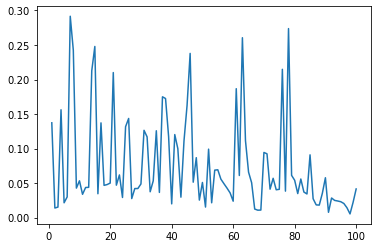

In [52]:
# visualizing the error after each epoch
import matplotlib.pyplot as plt
plt.plot(np.arange(1, epochs + 1), np.array(losses))

----
### ขั้นตอนที่ 6 ทดสอบ model 
เมื่อกระบวนการ Train (ปรับปรุง weight)เสร็จสิ้น จนเป็นที่พอใจแล้วขั้นตอนต่อไปคือการทดสอบ model  
ให้ทำการโหลด Test set เข้ามาทดสอบ


In [53]:
Input = Input_Test.T
Target = Target_Test.T
    
#########################
## Forward Propogation ##
#########################
# calculating hidden layer activations
Hidden = np.dot(weights_input_hidden.T,Input)
Hidden = sigmoid(Hidden)

# calculating the output
Output = np.dot(weights_hidden_output.T, Hidden)
Output = sigmoid(Output)


#check ผล
Class_Output = Output.argmax(axis=0)

correct = 0
miss = 0

#confusion matrix (row=Actual, col=Predicted)
conf_matrix = np.zeros((NumOutput,NumOutput),dtype='i')
for i in range(NumTest):
    if Class_Output[i] == Target[0][i]:
        correct += 1
    else:
        miss += 1
    conf_matrix[Target[0][i]][Class_Output[i]] += 1
    
    
print('Confusion Matrix (row=Actual, col=Predicted)')
print(conf_matrix)
print('accuracy = {0:.2f}%'.format((correct/NumTest)*100))

Confusion Matrix (row=Actual, col=Predicted)
[[7 3]
 [5 6]]
accuracy = 61.90%


### อย่าลืมว่าขณะนี้ทดสอบที่ fold 1 เท่านั้น จะต้องเรียก fold 2, 3, 4, 5 มา Train และ Test ให้ครบ   
### จากนั้นจึงเอา ค่า accuracy ของทั้ง 5 รอบมาหาค่าเฉลี่ยกัน จึงจะได้ ค่า accuracy ของ model 

In [54]:
def Evaluate_multifold(Input_array,Target_array, nfold):
    scores = []
    for n in range (nfold):
        #================================= Train & Test Split ================================= 
        
        Input_Train = np.zeros((187,60),dtype='f')
        Input_Test = np.zeros((21,60),dtype='f')
        Target_Train = np.zeros((187,1),dtype='i')
        Target_Test = np.zeros((21,1),dtype='i') 


        # กำหนด Train Set และ Test set
        indexTest = 0
        indexTrain = -1 # ต้องกำหนดให้เป็น -1 เพื่อป้องกัน Index Error เพราะมีการเรียกเกิน index ที่มี

        for i in range(NumData):

            if (i%10) == n:
                Input_Test[indexTest] = Input_array[i]
                Target_Test[indexTest] = Target_array[i]
                indexTest += 1
            else:
                Input_Train[indexTrain] = Input_array[i]
                Target_Train[indexTrain] = Target_array[i]
                indexTrain += 1

        NumTest = Input_Test.shape[0]  # จำนวน test = จำนวน row ของ Input_Test 
        NumTrain = Input_Train.shape[0] # จำนวน train = จำนวน row ของ Input_Train 

        np.random.seed(14)

        Input = Input_Train.T
        Target = Target_Train.T
        #================================= Hyperparameter  =================================
        NumInput = 60
        #Number of Hidden Layer = 1
        NumHidden = 60
        NumOutput = 2
        # กำหนดค่าเริ่มต้นของ Weight
        weights_input_hidden = np.random.uniform(size=(NumInput,NumHidden))
        weights_hidden_output = np.random.uniform(size=(NumHidden, NumOutput))
        # กำหนดค่า learning rate
        alpha = 0.01


        # กำหนด Acitvate function ที่จะนำมาใช้
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))


        # กำหนดจำนวน Epoch
        epochs = 100
        #================================= Train Model  =================================
        losses = []
        for epoch in range(epochs):
            # random ลำดับของ input ที่จะถูกป้อนเข้า nerual net เพื่อใช้ในการ train
            Train_seq = np.random.permutation(NumTrain)

            # Start Train
            for i in range(NumTrain):

                #########################
                ## Forward Propogation ##
                #########################
                # calculating hidden layer activations
                Hidden = np.dot(weights_input_hidden.T,Input[:,Train_seq[i]].reshape(NumInput,1) )
                Hidden = sigmoid(Hidden)

                # calculating the output
                Output = np.dot(weights_hidden_output.T, Hidden)
                Output = sigmoid(Output)

                ##########################
                ## Backward Propagation ##
                ##########################
                # calculating error
                #change shape NumOutput -->1
                Error = np.square(Target[:,Train_seq[i]].reshape(1,1) - Output) / 2

                # calculating rate of change of error w.r.t weight between hidden and output layer
                Error_wrt_output = -(Target[:,Train_seq[i]].reshape(1,1) - Output)
                Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
                OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden

                Error_wrt_weights_hidden_output = np.dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
                                                         (Error_wrt_output * Output_wrt_outputLayer_LinearTransform).T,)

                # calculating rate of change of error w.r.t weights between input and hidden layer
                OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
                HiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(Hidden, (1 - Hidden))
                HiddenLayer_linearTransform_wrt_weights_input_hidden = Input[:,Train_seq[i]].reshape(NumInput,1)
                Error_wrt_weights_input_hidden = np.dot(HiddenLayer_linearTransform_wrt_weights_input_hidden,
                    (HiddenLayer_activations_wrt_hiddenLayer_linearTransform
                        * np.dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
                        (Output_wrt_outputLayer_LinearTransform * Error_wrt_output),)).T,)

                # updating the weights
                weights_hidden_output = weights_hidden_output - alpha * Error_wrt_weights_hidden_output
                weights_input_hidden = weights_input_hidden - alpha * Error_wrt_weights_input_hidden

            # print error at every 10th epoch
            epoch_loss = np.average(Error)
            if epoch % 10 == 0:
                print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

            # appending the error of each epoch
            losses.append(epoch_loss)
        #================================= Test Model  =================================
        Input = Input_Test.T
        Target = Target_Test.T

        #########################
        ## Forward Propogation ##
        #########################
        # calculating hidden layer activations
        Hidden = np.dot(weights_input_hidden.T,Input)
        Hidden = sigmoid(Hidden)

        # calculating the output
        Output = np.dot(weights_hidden_output.T, Hidden)
        Output = sigmoid(Output)


        #check ผล
        Class_Output = Output.argmax(axis=0)

        correct = 0
        miss = 0

        #confusion matrix (row=Actual, col=Predicted)
        conf_matrix = np.zeros((NumOutput,NumOutput),dtype='i')
        for i in range(NumTest):
            if Class_Output[i] == Target[0][i]:
                correct += 1
            else:
                miss += 1
            conf_matrix[Target[0][i]][Class_Output[i]] += 1
            
            

        scores.append((correct/NumTest)*100)
        print('Confusion Matrix (row=Actual, col=Predicted)')
        print(conf_matrix)
        print('Actual : ',Target[0])
        print('Predicted :',Class_Output)
        print('Accuracy : {0:.2f}%'.format((correct/NumTest)*100))
        print("")
        print("Set Accuracy : ",scores)
        avg_scores = sum(scores)/float(len(scores))
        print("Mean Accuracy : {0:.3f}%".format(avg_scores))
        print(f"================================ Fold:{n+1} ====================================")
        print("")
                                       
        


In [55]:
Evaluate_multifold(Input_array,Target_array, 10)

Error at epoch 0 is 0.50000
Error at epoch 10 is 0.00000
Error at epoch 20 is 0.00000
Error at epoch 30 is 0.00000
Error at epoch 40 is 0.00000
Error at epoch 50 is 0.50000
Error at epoch 60 is 0.00000
Error at epoch 70 is 0.00000
Error at epoch 80 is 0.50000
Error at epoch 90 is 0.00000
Confusion Matrix (row=Actual, col=Predicted)
[[10  0]
 [11  0]]
Actual :  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Predicted : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy : 47.62%

Set Accuracy :  [47.61904761904761]
Mean Accuracy : 47.619%
================================ Fold:1 ====================================

Error at epoch 0 is 0.50000
Error at epoch 10 is 0.00000
Error at epoch 20 is 0.00000
Error at epoch 30 is 0.00000
Error at epoch 40 is 0.00000
Error at epoch 50 is 0.50000
Error at epoch 60 is 0.00000
Error at epoch 70 is 0.00000
Error at epoch 80 is 0.50000
Error at epoch 90 is 0.00000
Confusion Matrix (row=Actual, col=Predicted)
[[10  0]
 [11  0]]
Actual :  [0 0 0 0 0 0 0 0 

### 